# Analysing housing rent prices using 3 datasets. The datasets were extracted from the CMHC websit they are housing price indicaters, household average income and average price for 2 bedroom apartments.

There is still a lot of work to be done on this project, but for the most part the the infprmation below will give you a good grasp of datasets.

Susiette Adams 3030594

In [1]:
# Loading packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas import read_table
from scipy.stats import norm
%matplotlib inline

In [63]:
# Importing the Renter Household data
rent= pd.read_csv(r"C:\\Users\\susie\\Documents\\Data Science\\Capstone data\\Average price 2 bedrooms.csv"
                   ,encoding="latin")
rent.head(5)

,City,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,St. JohnÕs,566.0,554.0,559.0,565.0,570.0,567.0,513.0,517.0,552.0,...,614.0,630.0,677.0,725.0,771.0,798.0,864.0,888.0,923.0,958.0
1,Halifax,595.0,604.0,610.0,615.0,617.0,616.0,631.0,637.0,648.0,...,815.0,833.0,877.0,891.0,925.0,954.0,976.0,1005.0,1048.0,1063.0
2,Moncton,469.0,479.0,495.0,504.0,513.0,523.0,531.0,538.0,560.0,...,643.0,656.0,675.0,691.0,715.0,731.0,742.0,762.0,760.0,798.0
3,Saint John,429.0,436.0,439.0,437.0,441.0,449.0,452.0,457.0,460.0,...,570.0,618.0,644.0,645.0,670.0,691.0,691.0,714.0,718.0,720.0
4,Saguenay,420.0,419.0,416.0,417.0,423.0,425.0,428.0,428.0,438.0,...,490.0,518.0,518.0,535.0,557.0,549.0,571.0,595.0,598.0,587.0


# Finding the to 10 hightest and lowest rent prices for 2 bedroom apartments.


In [4]:
# Using the n.largest I will search the data to find the highest prices for 2 bedroom apartments.
lrg = rent.nlargest(10, ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
lrg

,City,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
32,Vancouver,771.0,790.0,812.0,826.0,845.0,852.0,870.0,864.0,890.0,...,1084.0,1124.0,1169.0,1195.0,1237.0,1261.0,1281.0,1311.0,1368.0,1450.0
14,Toronto,754.0,773.0,784.0,805.0,819.0,821.0,881.0,916.0,979.0,...,1061.0,1095.0,1096.0,1123.0,1149.0,1183.0,1213.0,1251.0,1288.0,1327.0
10,Ottawa,700.0,727.0,738.0,738.0,739.0,729.0,754.0,783.0,877.0,...,961.0,995.0,1028.0,1048.0,1086.0,1115.0,1132.0,1132.0,1174.0,1201.0
33,Victoria,684.0,703.0,713.0,715.0,717.0,724.0,722.0,728.0,731.0,...,907.0,965.0,1001.0,1024.0,1045.0,1059.0,1068.0,1095.0,1128.0,1188.0
22,Barrie,653.0,670.0,687.0,712.0,713.0,737.0,774.0,788.0,830.0,...,934.0,954.0,961.0,968.0,1001.0,1037.0,1048.0,1118.0,1167.0,1150.0
13,Oshawa,651.0,659.0,659.0,689.0,700.0,691.0,726.0,745.0,778.0,...,877.0,889.0,900.0,903.0,941.0,939.0,985.0,1010.0,1035.0,1109.0
24,Thunder Bay,620.0,632.0,655.0,659.0,672.0,666.0,647.0,647.0,654.0,...,709.0,719.0,742.0,763.0,772.0,818.0,858.0,888.0,917.0,940.0
21,Windsor,620.0,631.0,643.0,667.0,682.0,680.0,680.0,696.0,736.0,...,773.0,772.0,747.0,752.0,753.0,778.0,788.0,798.0,824.0,852.0
19,Guelph,618.0,626.0,642.0,642.0,658.0,678.0,686.0,702.0,736.0,...,848.0,869.0,874.0,887.0,903.0,941.0,957.0,988.0,1027.0,1078.0
31,Abbotsford-Mission,615.0,635.0,640.0,651.0,645.0,628.0,633.0,630.0,632.0,...,752.0,765.0,781.0,785.0,800.0,818.0,820.0,835.0,864.0,915.0


In [5]:
# The outputs above shows the 10 least exensive cities to rent apartments. 

# Here we are filtering the rent dataset to find the top 10 least expensive cities

In [33]:
# The .nsmallest was used t get the cities with the lowest prices for 2 bedroom apartments
sml = rent.nsmallest(10, ['1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'])
sml

,City,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 26
18,Trois-Rivires,395,400,402,406,405,406,411,403,413,...,505,520,533,547,550,555,568,581,587,NaN
17,Sherbrooke,408,418,420,422,426,426,433,434,437,...,543,553,566,577,578,591,604,608,622,NaN
15,Saguenay,420,419,416,417,423,425,428,428,438,...,518,518,535,557,549,571,595,598,587,NaN
14,Saint John,429,436,439,437,441,449,452,457,460,...,618,644,645,670,691,691,714,718,720,NaN
38,Saskatoon,444,449,452,460,479,500,516,529,541,...,841,905,934,966,1002,1041,1091,1087,1100,NaN
8,Saskatchewan,454,458,459,465,477,494,507,522,529,...,762,833,873,914,958,995,1048,1051,1052,NaN
4,New Brunswick,461,470,479,484,490,499,503,510,515,...,635,656,668,687,707,715,735,744,763,NaN
13,Moncton,469,479,495,504,513,523,531,538,560,...,656,675,691,715,731,742,762,760,798,NaN
5,Quebec,473,471,472,481,479,479,486,491,495,...,628,640,666,684,681,699,711,728,751,NaN
37,Regina,484,487,485,487,494,512,525,547,549,...,756,832,881,932,979,1018,1079,1097,1109,NaN


In [7]:
# # Above we have the top 10 cities with the highest rent prices.
# Theses are the cities and price we are going to focus on the reason being we are trying to find the best livable cities.

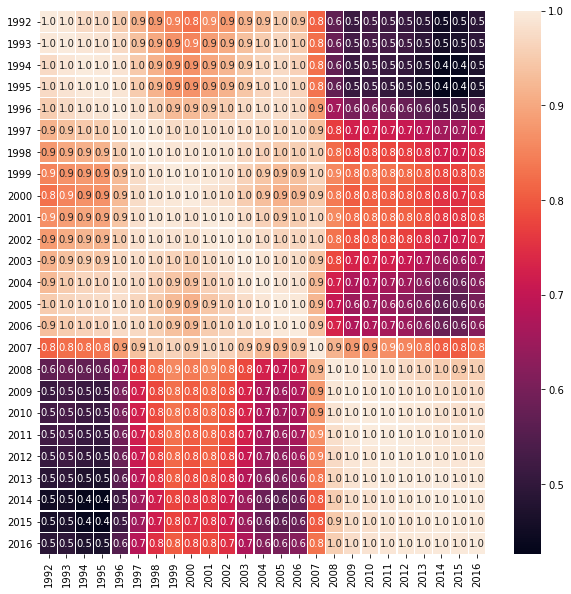

In [8]:
# Plotting the correlation data to get a better visual on the graph
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(sml.corr(), annot = True,linewidths=.4, fmt='.1f', ax=ax)
plt.show()

In [9]:
# What this allows us to do is quickly see which features have the most significant (positive) correlations, and 
# also see which features are unlikely to be relevant. 
#In the top 10 least expensive cites 2001,2002, and 1999 appears to have the strongest correlation in the data.

In [34]:
#Renaming 2001 column name
sml.rename(columns={'2001': 'price1'}, inplace=True)


In [35]:
#Renaming 2001 column name
sml.rename(columns={'2002': 'price2'}, inplace=True)

In [36]:
#Renaming 2001 column name
sml.rename(columns={'1999': 'price99'}, inplace=True)

In [13]:
# I have renaemd the columns above because I have choose the will be using these columns to do my predictions.

In [14]:
#Show the top 10 feature which have strongest correlation with SalePrice
corr_rent = sml.corr().price1
corr_field = corr_rent.sort_values(ascending = False).head(10)
corr_field

price1     1.000000
price2     0.995692
price99    0.994746
1998       0.993294
2000       0.988753
1997       0.983749
2003       0.979227
2007       0.970616
2004       0.961204
2006       0.953410
Name: price1, dtype: float64


 mu = 511.40 and sigma = 56.13



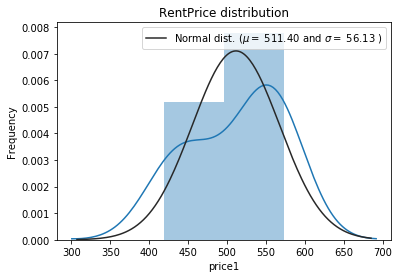

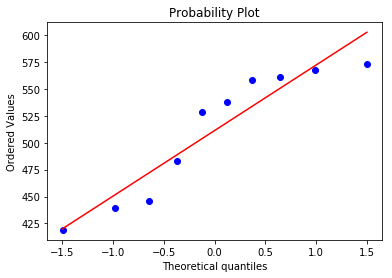

In [15]:
## let's do some analysis on this variable first.
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(sml['price1'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(sml['price1'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('RentPrice distribution')

fig = plt.figure()
res = stats.probplot(sml['price1'], plot=plt)
plt.show()

In [16]:
# The probability plot plots the data and calculates a best-fit line for the data.
# The default is ‘norm’ for a normal probability plot. 

In [17]:
#skewness and kurtosis
print("Skewness: %f" % sml['price1'].skew())
print("Kurtosis: %f" % sml['price1'].kurt())

Skewness: -0.542017
Kurtosis: -1.573471


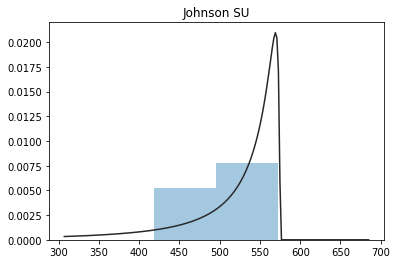

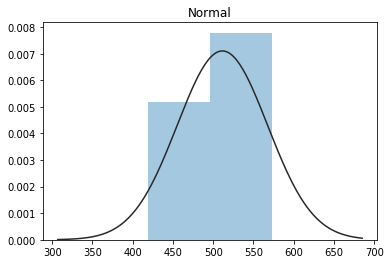

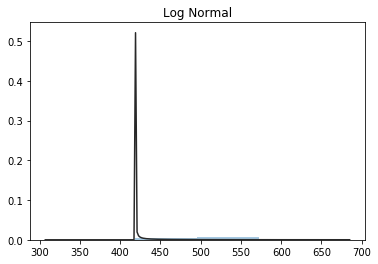

In [18]:
#  Johnson Su distribution plot for 2005

import scipy.stats as st
y = sml[['price1']]
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [19]:
# The Johnson su distribution probability plot above did a transformation of the normal distribution of the data

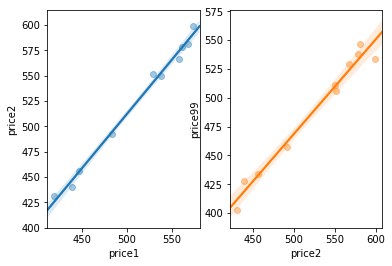

In [20]:
# Regression plot
fig, ax = plt.subplots(1,2)
sns.regplot('price1','price2',sml, ax=ax[0], scatter_kws={'alpha':0.4})
sns.regplot('price2','price99',sml,ax=ax[1], scatter_kws={'alpha':0.4})


In [21]:
##The line of best fit is calculated by minimizing the ordinary least squares error function, that Seaborn module does automatically using the regplot function.
#The shaded area around the line represents 95% confidence intervals calculates and plots residuals.
# The regplts help to understand and improve the regression model. 

Text(0, 0.5, 'price2 residual')

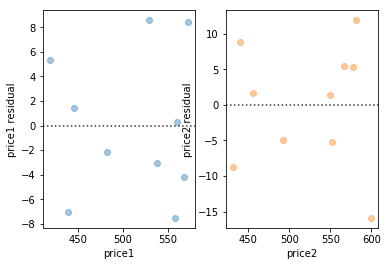

In [22]:
# visualizing the residuals by creating residual plots .
fig, ax = plt.subplots(1,2)
ax[0]= sns.residplot('price1','price2', sml,ax=ax[0], scatter_kws={'alpha':0.4})
ax[0].set_ylabel('price1 residual')
ax[1]=sns.residplot('price2','price99',sml,ax=ax[1], scatter_kws={'alpha':0.4})
ax[1].set_ylabel('price2 residual')

In [23]:
# The points in the residual plot represent the difference between the sample (y) and the predicted value (y’). 
#Residuals that are greater than zero are points that are underestimated by the model and residuals less than zero are points that are overestimated by the model.


In [24]:
# Next we’ll want to fit a linear regression model. We need to choose variables that we think we’ll be good predictors for the dependent variable.
# This can be done by checking the correlation(s) between variables, on what variables are good predictors of y.

import statsmodels.api as sm

X = sml["price1"]
y = sml["price2"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

C:\Users\susie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 price2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.664e+04
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.00e-18
Time:                        13:03:16   Log-Likelihood:                -32.332
No. Observations:                  10   AIC:                             66.66
Df Residuals:                       9   BIC:                             66.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price1         1.0263      0.004    258.147      0.000       1.017       1.035
==============================================================================
Omnibus:                        0.586   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.365
Skew:                           0.400   Prob(JB):                        0.833
Kurtosis:                       2.514   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that
# would minimize the square of distance from the regression line.

In [26]:
# # Next we’ll want to fit a linear regression model by adding a constant. 
X = sml["price1"] ## X usually means our input variables (or independent variables)
y = sml["price2"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\susie\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\susie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 price2   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     922.6
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.50e-09
Time:                        13:03:16   Log-Likelihood:                -31.413
No. Observations:                  10   AIC:                             66.83
Df Residuals:                       8   BIC:                             67.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.0439     18.138     -1.270      0.240     -64.870      18.782
price1         1.0709      0.035     30.375      0.000       0.990       1.152
==============================================================================
Omnibus:                        1.276   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.766
Skew:                           0.280   Prob(JB):                        0.682
Kurtosis:                       1.765   Cond. No.                     4.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#  With the constant term the coefficients are different. Without a constant we are forcing our model to go through the origin.


In [37]:
def method_name():
    from sklearn.linear_model import Linear_Regression
    return Linear_Regression

def method_name():
    from sklearn.metrics import mean_sqared_error
    return mean_sqared_error



In [29]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [38]:
def method_name():
    from sklearn.linear_model import Linear_Regression
    return Linear_Regression
def method_name():
    from sklearn.metrics import mean_sqared_error
    return mean_sqared_error

def get_mse(sml, price1, price2):
    y=sml['price2'].values
    x=sml['price1'].values.reshape(-1,1)
    print('{}~{}'.format(price1,price2))
    
    lm = LinearRegression()
    lm.fit(x,y)
    msg= 'model:y={:.3f} + {:.3f}x'\
    .format(lm.intercept_,lm.coef_[0])
    print(msg)
    
    y_pred = lm.pred(x)
    error = mean_square_error(y, y_pred)
    print= ('mse = {:.2f}'.format(error))
    print()
    

In [39]:
get_mse(sml,'price1')
get_mse(sml,'price2')

TypeError: get_mse() missing 1 required positional argument: 'price2'

In [87]:
sml['data']

KeyError: 'data'

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

def method_name():
    from sklearn.model_selection import cross_validate
    return cross_validate

price1 = sml.iloc[price1:,1].values
price2 = sml.iloc[price2:,2].values



X_train, X_test, y_train, y_test = train_test_split(price2, price, test_size=0.2, random_state = 42)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

NameError: name 'price1' is not defined

In [41]:
import pandas as pd
import matplotlib as pt

y=sml['price2'].values
x=sml['price1'].values.reshape(-1,1)

#Spliting the dataset into Training set and Test Set
def method_name(): 
    from sklearn.cross_validation import train_test_split
    return train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

#linnear Regression

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

In [42]:
import pandas as pd
import matplotlib as pt

y=sml[price2].values
x=sml[price1].values.reshape(-1,1)

x = sml.iloc[:, 5].values
y = sml.iloc[:, 12].values

#Spliting the dataset into Training set and Test Set
def method_name(): 
    from sklearn.cross_validation import train_test_split
    return train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

#linnear Regression

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

NameError: name 'price2' is not defined

In [43]:
from sklearn.ensemble import RandomForestRegressor
reg_ran = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [44]:
#Using GridSearchCV to find the optimimal parameter
def method_name():
    from sklearn.model_selection import GridSearchCV
    return GridSearchCV

parameters = [{'n_estimators': [10, 100, 1000], 'max_depth': [10,100,1000]}]
grid_search = GridSearchCV(estimator = reg_ran,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_log_error',
                           cv = 3,
                           n_jobs = (-3,3)
grid_search = grid_search.fit(x_train, y_train)

SyntaxError: invalid syntax (<ipython-input-44-5d3a4d6640a1>, line 12)

In [45]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(price2, price1):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(price2, price1)
    
    # Return the score
    return score


In [46]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    return score

In [47]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge
# Import supplementary visualizations code visuals.py
import vpython as vs
# Pretty display for notebooks
%matplotlib inline


price1 = sml['price1']
price2 = sml['price2']

<IPython.core.display.Javascript object>

In [48]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(price2, price1, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [49]:
from vpython import *

In [50]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(price2, price1)

AttributeError: module 'vpython' has no attribute 'ModelLearning'

In [51]:
from sklearn.model_selection import cross_validate
from sklearn import datasets
from sklearn import svm

iris = (price2, price1)



clf = svm.SVC(kernel='linear', C=1 probability=True).fit(X_train, y_train)

# We give cross_val_score a model, the entire data set and its "real" values, and the number of folds:
scores = cross_validate.cross_val_score(clf, iris.price2, iris.price1, cv=5)



# Print the accuracy for each fold:
print ('Accuracies of 5 folds:'), scores

# And the mean accuracy of all 5 folds:
print ('Mean accuracy of 5 folds: '), scores.mean()

SyntaxError: invalid syntax (<ipython-input-51-9d8aa4178111>, line 9)

In [52]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
y = price1
X = price2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
dummy_median = DummyRegressor(strategy='mean')
dummy_regressor = dummy_median.fit(X_train,y_train)
dummy_predicts = dummy_regressor.predict(X_test)
print("Model Accuracy:", dummy_regressor.score(X_test,y_test)*100)

Model Accuracy: -999.3756503642039


In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
models = [RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=20,random_state=100),DecisionTreeRegressor(criterion='mse',max_depth=11,random_state=100),GradientBoostingRegressor(n_estimators=200,max_depth=12)]
learning_mods = pd.DataFrame()
temp = {}#run through models
for model in models:
    print(model)
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    model.fit(X_train, y_train)
    temp['R2_Price'] = r2_score(y_test, model.predict(X_test))
    print('score on training',model.score(X_train, y_train))
    print('r2 score',r2_score(y_test, model.predict(X_test)))
    learning_mods = learning_mods.append([temp])
learning_mods.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=-1,1, figsize=(10, 4))
learning_mods.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-53-2412c8a40204>, line 18)

In [55]:
def method_name():
    from sklearn import metrics
    return metrics

metrics = method_name()
def method_name():
    from sklearn import linear_model
    return linear_model

linear_model = method_name()
def method_name():
    from sklearn import model_selection
    return model_selection

model_selection = method_name()
def method_name():
    from sklearn.tree import DecisionTreeRegressor
    return DecisionTreeRegressor

DecisionTreeRegressor = method_name()
 
def performance_metric(y_true, y_predict):
    error = metrics.mean_squared_error(y_true, y_predict)
    return error
 
def fit_model(price1, price2):
    regressor = DecisionTreeRegressor()
param_grid = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}
scoring_fnc = metrics.make_scorer(performance_metric, False)
reg = GridSearchCV(regressor, param_grid, scoring = scoring_fnc, cv = 3)
reg.fit(price1, price2)
def method_name():
    return reg.best_estimator_

return method_name()
 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
regression = fit_model(X_train, y_train)
client = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]
pred_price = regression.predict(client)[0]
 
print("Predicted value: {0:.2f}".format(pred_house_price), "(No Feature Selection)")
 
#print(data.head()) 
X_train_f, X_test_f, y_train_f, y_test_f = model_selection.train_test_split(price1, price2, test_size=0.3, random_state=42)
regression_f = fit_model(X_train_f, y_train_f)
client = [[5.6090, 12.13, 20.20]]
pred_house_price = regression_f.predict(client)[0]
print("Predicted value: {0:.2f}".format(pred_house_price), "(Features Selected)")
print()
 
y_pred = regression.predict(X_test)
plt.figure()
plt.title("Decision Tree Regressor (Model Actual vs Precited) with All Features")
plt.xlabel('TEST SET')
plt.ylabel('pri2e2')
plt.plot(y_pred, 'o-', color="r", label="Predicted price2")
plt.plot(y_test, 'o-', color="g", label="Actual price2")
 
y_pred_f = regression_f.predict(X_test_f)
plt.figure()
plt.title("Decision Tree Regressor (Model Actual vs Precited) with Selected Features")
plt.xlabel('TEST SET')
plt.ylabel('price2')
plt.plot(y_pred_f, 'o-', color="r", label="Predicted price2")
plt.plot(y_test_f, 'o-', color="g", label="Actual price2")



NameError: name 'GridSearchCV' is not defined

In [ ]:
pip install jupyter-cjk-xelatex

In [56]:
numerical_features = sml.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['1992', '1993', '1994', '1995', '1996', '1997', '1998', 'price99',
       '2000', 'price1', 'price2', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Unnamed: 26'],
      dtype='object')

In [57]:
numerical_features = pd.get_dummies(numerical_features)
numerical_features.shape


(26, 26)

In [58]:
numerical_features.head()

,1992,1993,1994,1995,1996,1997,1998,2000,2003,2004,...,2011,2012,2013,2014,2015,2016,Unnamed: 26,price1,price2,price99
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
str(numerical_features.isnull().values.sum())

'0'

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
train = pd.concat([numerical_features],axis=1)
train.shape

(26, 26)

In [62]:
#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size = 0.3,random_state= 0)

ValueError: Found input variables with inconsistent numbers of samples: [26, 10]